# Xây dựng một số mô hình dự đoán biến động giá cổ phiếu (LTSM, Linear Regression)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas_ta
import pandas_ta as ta


## Xử lý data

In [2]:
df1 = pd.read_csv('FPT.csv')
df2 = pd.read_csv('MSN.csv')
df3 = pd.read_csv('PNJ.csv')
df4 = pd.read_csv('VIC.csv')
df2

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
135349,MSN,12/22/2020 14:23,82.8,82.8,82.8,82.8,700,0
135350,MSN,12/22/2020 14:24,82.7,82.8,82.7,82.8,4660,0
135351,MSN,12/22/2020 14:25,82.8,82.8,82.8,82.8,50,0
135352,MSN,12/22/2020 14:27,82.8,82.8,82.8,82.8,300,0


In [3]:
dfs = [df1, df2, df3, df4]

for df in dfs:
  df['RSI'] = ta.rsi(df.Close)
  df['EMAF'] = ta.ema(df.Close, length=20)
  df['EMAM'] = ta.ema(df.Close, length=100)
  df['EMAS'] = ta.ema(df.Close, length=150)

  df['Target'] = df['Close'].shift() - df['Close']
  df['TargetNextClose'] = df['Close'].shift(-1)
  df.dropna(inplace=True)
  df.drop(['Open Interest', 'Ticker', 'Date/Time'], axis=1, inplace=True)
  data_set = df.iloc[:, 0:11]
  pd.set_option('display.max_columns', None)

data_set_fpt = df1.iloc[:, 0:11]
data_set_msn = df2.iloc[:, 0:11]
data_set_pnj = df3.iloc[:, 0:11]
data_set_vic = df4.iloc[:, 0:11]

## Sử dụng Model

### 1. LTSM

#### FPT

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled_fpt = sc.fit_transform(data_set_fpt)
data_set_scaled_msn = sc.fit_transform(data_set_msn)
data_set_scaled_pnj = sc.fit_transform(data_set_pnj)
data_set_scaled_vic = sc.fit_transform(data_set_vic)

In [5]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
# print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled_fpt.shape[0]):#backcandles+2
        X[j].append(data_set_scaled_fpt[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled_fpt[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.03872114 0.03858407 0.0397445  ... 0.63826637 0.03326209 0.02627367]
  [0.03872114 0.03964602 0.0397445  ... 0.6612669  0.03370171 0.026468  ]
  [0.03872114 0.03858407 0.0397445  ... 0.6172129  0.03399679 0.02663686]
  ...
  [0.03445826 0.03433628 0.03548616 ... 0.36653376 0.03540298 0.02949306]
  [0.03445826 0.03433628 0.03548616 ... 0.36653376 0.03512536 0.02951549]
  [0.03587922 0.03575221 0.03690561 ... 0.44242777 0.03501107 0.02956631]]

 [[0.03872114 0.03964602 0.0397445  ... 0.6612669  0.03370171 0.026468  ]
  [0.03872114 0.03858407 0.0397445  ... 0.6172129  0.03399679 0.02663686]
  [0.03872114 0.03858407 0.0397445  ... 0.6172129  0.03426378 0.02680237]
  ...
  [0.03445826 0.03433628 0.03548616 ... 0.36653376 0.03512536 0.02951549]
  [0.03587922 0.03575221 0.03690561 ... 0.44242777 0.03501107 0.02956631]
  [0.03730018 0.03716814 0.03832505 ... 0.50619305 0.03504456 0.02964497]]

 [[0.03872114 0.03858407 0.0397445  ... 0.6172129  0.03399679 0.02663686]
  [0.03872114 0.038584

In [6]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

77780
(77780, 30, 8)
(19446, 30, 8)
(77780, 1)
(19446, 1)
[[0.03730018]
 [0.03730018]
 [0.03730018]
 ...
 [0.63410302]
 [0.63410302]
 [0.63232682]]


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=2, shuffle=True, validation_split = 0.1)

Epoch 1/2
4667/4667 [==============================] - 207s 44ms/step - loss: 1.9924e-04 - val_loss: 9.2698e-06
Epoch 2/2
4667/4667 [==============================] - 212s 45ms/step - loss: 1.9416e-05 - val_loss: 6.1978e-06


In [8]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

608/608 [==============================] - 14s 23ms/step
[0.6333378] [0.63232682]
[0.6316215] [0.63055062]
[0.63157666] [0.63055062]
[0.63004446] [0.63232682]
[0.62952447] [0.63055062]
[0.6315588] [0.63055062]
[0.6307259] [0.63232682]
[0.6301834] [0.63055062]
[0.6318044] [0.63055062]
[0.63065374] [0.63055062]


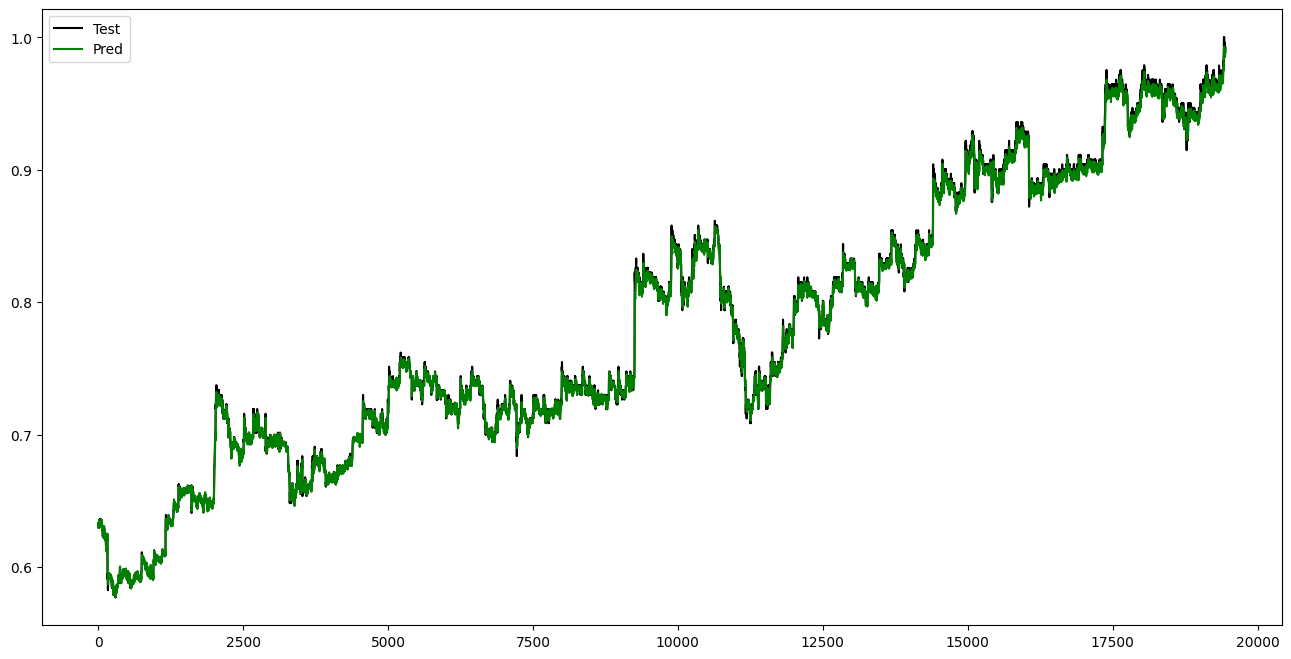

In [9]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Pred')
plt.legend()
plt.show()

#### MSN

In [10]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
# print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled_msn.shape[0]):#backcandles+2
        X[j].append(data_set_scaled_msn[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled_msn[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.39551192 0.39440559 0.3941094  ... 0.45533829 0.39757896 0.39617862]
  [0.39270687 0.39160839 0.3941094  ... 0.45533829 0.39735086 0.39622276]
  [0.39130435 0.39020979 0.39270687 ... 0.43345927 0.39701006 0.39623775]
  ...
  [0.40392707 0.4027972  0.40532959 ... 0.7247583  0.40161343 0.39939025]
  [0.40252454 0.4013986  0.40392707 ... 0.64876231 0.40194204 0.39956878]
  [0.40252454 0.4013986  0.40392707 ... 0.64876231 0.40223937 0.39974378]]

 [[0.39270687 0.39160839 0.3941094  ... 0.45533829 0.39735086 0.39622276]
  [0.39130435 0.39020979 0.39270687 ... 0.43345927 0.39701006 0.39623775]
  [0.39130435 0.39440559 0.39270687 ... 0.5091669  0.39710498 0.3963373 ]
  ...
  [0.40252454 0.4013986  0.40392707 ... 0.64876231 0.40194204 0.39956878]
  [0.40252454 0.4013986  0.40392707 ... 0.64876231 0.40223937 0.39974378]
  [0.3997195  0.3986014  0.40112202 ... 0.52155198 0.40223953 0.39985874]]

 [[0.39130435 0.39020979 0.39270687 ... 0.43345927 0.39701006 0.39623775]
  [0.39130435 0.394405

In [11]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

108139
(108139, 30, 8)
(27035, 30, 8)
(108139, 1)
(27035, 1)
[[0.39944134]
 [0.39944134]
 [0.39944134]
 ...
 [0.14804469]
 [0.14804469]
 [0.14944134]]


In [12]:
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=2, shuffle=True, validation_split = 0.1)

Epoch 1/2
6489/6489 [==============================] - 264s 40ms/step - loss: 1.3928e-04 - val_loss: 2.1431e-05
Epoch 2/2
6489/6489 [==============================] - 249s 38ms/step - loss: 2.0468e-05 - val_loss: 2.1937e-05


In [13]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

845/845 [==============================] - 21s 25ms/step
[0.15268025] [0.15083799]
[0.15315141] [0.15083799]
[0.15418324] [0.15083799]
[0.15445334] [0.15083799]
[0.1540619] [0.1452514]
[0.15325794] [0.1424581]
[0.14915745] [0.1424581]
[0.14758922] [0.14385475]
[0.14710914] [0.14385475]
[0.14791457] [0.1452514]


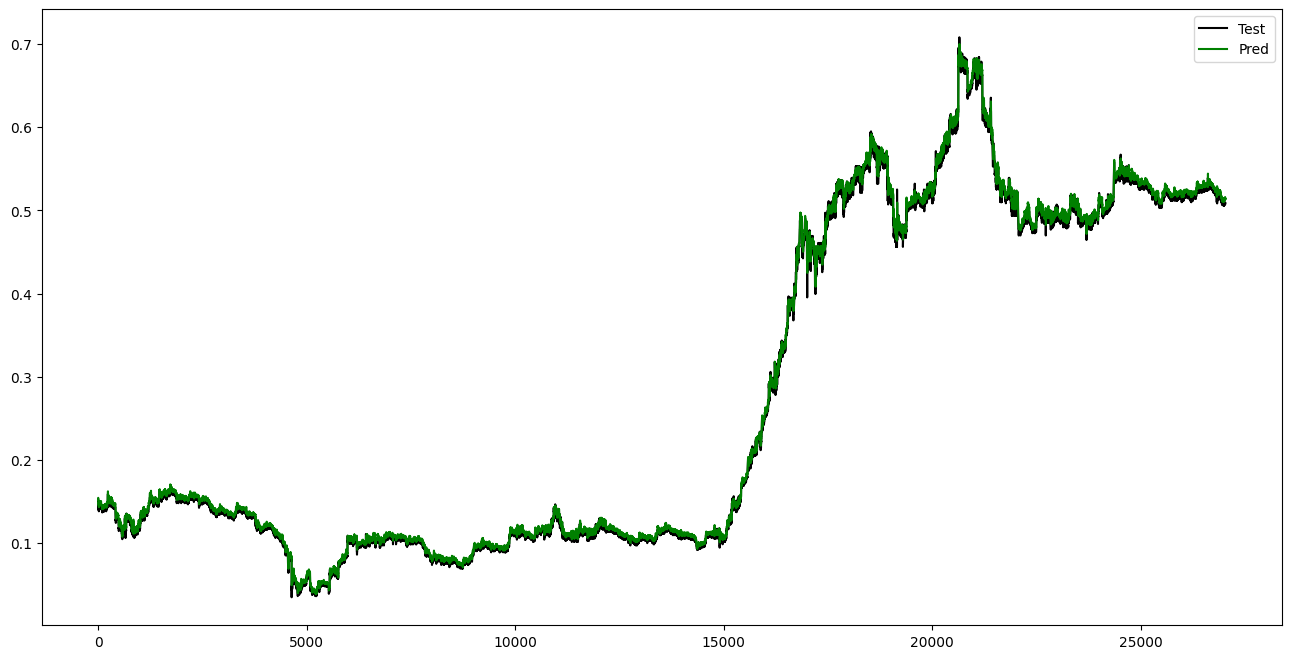

In [14]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Pred')
plt.legend()
plt.show()

#### PNJ

In [15]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
# print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled_pnj.shape[0]):#backcandles+2
        X[j].append(data_set_scaled_pnj[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled_pnj[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.61582631 0.61603451 0.61849608 ... 0.487812   0.63276538 0.63507225]
  [0.61672349 0.61603451 0.61938703 ... 0.487812   0.63277148 0.63508728]
  [0.61672349 0.61603451 0.61600143 ... 0.47220264 0.63243324 0.63502872]
  ...
  [0.61421138 0.61351789 0.61689237 ... 0.42431085 0.63390782 0.63611567]
  [0.61510856 0.61441668 0.61778332 ... 0.44150026 0.63364229 0.63607533]
  [0.61331419 0.61261909 0.61600143 ... 0.41345097 0.63322111 0.6359972 ]]

 [[0.61672349 0.61603451 0.61938703 ... 0.487812   0.63277148 0.63508728]
  [0.61672349 0.61603451 0.61600143 ... 0.47220264 0.63243324 0.63502872]
  [0.61331419 0.61693331 0.61600143 ... 0.49327918 0.63256143 0.63506391]
  ...
  [0.61510856 0.61441668 0.61778332 ... 0.44150026 0.63364229 0.63607533]
  [0.61331419 0.61261909 0.61600143 ... 0.41345097 0.63322111 0.6359972 ]
  [0.61331419 0.61261909 0.61600143 ... 0.41345097 0.63284005 0.63592063]]

 [[0.61672349 0.61603451 0.61600143 ... 0.47220264 0.63243324 0.63502872]
  [0.61331419 0.616933

In [16]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

100103
(100103, 30, 8)
(25026, 30, 8)
(100103, 1)
(25026, 1)
[[0.61531596]
 [0.61531596]
 [0.61531596]
 ...
 [0.27061764]
 [0.27061764]
 [0.27240271]]


In [17]:
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=2, shuffle=True, validation_split = 0.1)

Epoch 1/2
6007/6007 [==============================] - 233s 38ms/step - loss: 2.3879e-04 - val_loss: 1.6005e-05
Epoch 2/2
6007/6007 [==============================] - 230s 38ms/step - loss: 1.5895e-04 - val_loss: 1.5182e-05


In [18]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

783/783 [==============================] - 15s 18ms/step
[0.2678931] [0.27240271]
[0.26945806] [0.27240271]
[0.27021503] [0.27240271]
[0.2705121] [0.27061764]
[0.27044046] [0.27240271]
[0.26847485] [0.27240271]
[0.26887736] [0.27240271]
[0.2691034] [0.27240271]
[0.2694062] [0.27240271]
[0.2695767] [0.27240271]


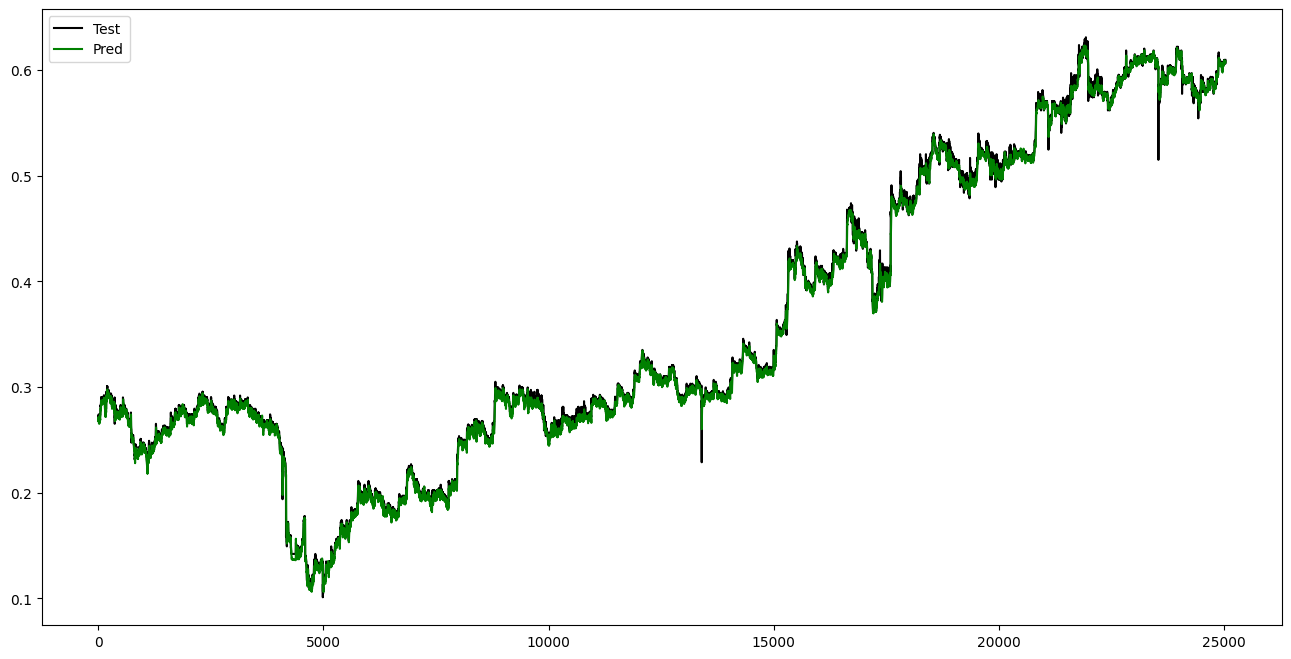

In [19]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Pred')
plt.legend()
plt.show()

#### VIC

In [20]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
# print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled_vic.shape[0]):#backcandles+2
        X[j].append(data_set_scaled_vic[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled_vic[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.52495697 0.52136752 0.52495697 ... 0.49169124 0.50216279 0.5015955 ]
  [0.52495697 0.52307692 0.52495697 ... 0.57983771 0.50233422 0.50159582]
  [0.52495697 0.52136752 0.52495697 ... 0.4887336  0.50231597 0.50155951]
  ...
  [0.51807229 0.51794872 0.51807229 ... 0.45255478 0.50077841 0.50051127]
  [0.51979346 0.51623932 0.51979346 ... 0.42419033 0.50038832 0.50038658]
  [0.51807229 0.51452991 0.51807229 ... 0.39736804 0.49986205 0.50022774]]

 [[0.52495697 0.52307692 0.52495697 ... 0.57983771 0.50233422 0.50159582]
  [0.52495697 0.52136752 0.52495697 ... 0.4887336  0.50231597 0.50155951]
  [0.5232358  0.51965812 0.5232358  ... 0.41800007 0.50212613 0.5014873 ]
  ...
  [0.51979346 0.51623932 0.51979346 ... 0.42419033 0.50038832 0.50038658]
  [0.51807229 0.51452991 0.51807229 ... 0.39736804 0.49986205 0.50022774]
  [0.51979346 0.51623932 0.51979346 ... 0.43584581 0.49955923 0.50010867]]

 [[0.52495697 0.52136752 0.52495697 ... 0.4887336  0.50231597 0.50155951]
  [0.5232358  0.519658

In [21]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

80868
(80868, 30, 8)
(20218, 30, 8)
(80868, 1)
(20218, 1)
[[0.51623932]
 [0.51452991]
 [0.51452991]
 ...
 [0.32478632]
 [0.32478632]
 [0.32478632]]


In [22]:
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=2, shuffle=True, validation_split = 0.1)

Epoch 1/2
4853/4853 [==============================] - 186s 38ms/step - loss: 3.4700e-04 - val_loss: 2.0780e-05
Epoch 2/2
4853/4853 [==============================] - 186s 38ms/step - loss: 3.1576e-05 - val_loss: 1.7152e-05


In [23]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

632/632 [==============================] - 13s 20ms/step
[0.32377517] [0.32136752]
[0.3235513] [0.32478632]
[0.3214531] [0.32136752]
[0.32342374] [0.32136752]
[0.32189035] [0.32136752]
[0.32172096] [0.32478632]
[0.32119614] [0.32136752]
[0.32379514] [0.32136752]
[0.32282275] [0.32136752]
[0.32185698] [0.32478632]


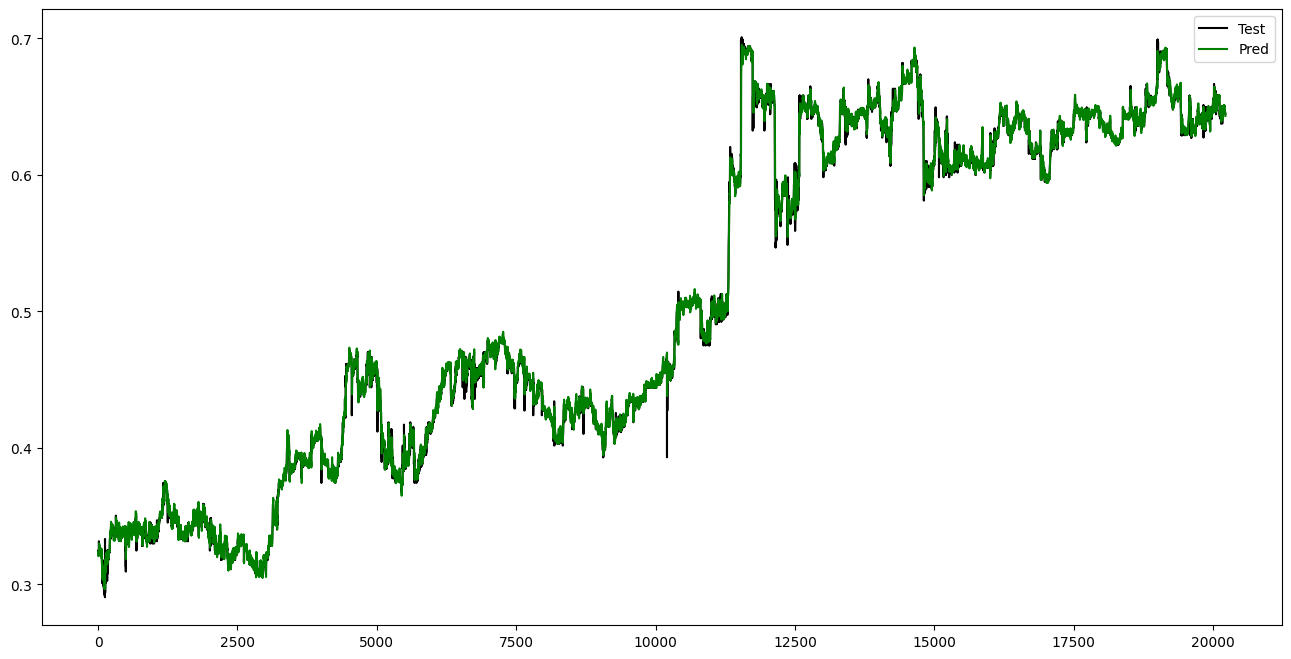

In [24]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Pred')
plt.legend()
plt.show()

### Linear Regression

#### FPT

In [25]:
x = df1[['Close',	'RSI', 'EMAF', 'EMAM',	'EMAS',	'TargetNextClose']]
y = df1['Target']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(x_train.shape, x_test.shape)

(72942, 6) (24314, 6)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
print(regressor.coef_)
print(regressor.intercept_)

[-4.28696926e-01 -1.09638471e-04  4.38106737e-01 -3.33358190e-01
  1.92408092e-01  1.31588023e-01]
0.0035838105504219946


In [29]:
predicted = regressor.predict(x_test)
print(x_test)
print(predicted)

       Close        RSI       EMAF       EMAM       EMAS  TargetNextClose
41817  47.46  43.050753  47.505227  47.440994  47.349726            47.55
18132  37.94  57.289955  37.903935  37.939159  37.950017            37.94
65972  48.80  39.408552  48.869502  48.946836  48.950846            48.75
73456  48.65  51.732163  48.634248  48.648421  48.657431            48.65
65326  48.50  37.768676  48.579658  48.760958  48.799941            48.45
...      ...        ...        ...        ...        ...              ...
21860  39.49  53.020064  39.491216  39.381909  39.377822            39.49
43387  47.63  49.334150  47.659529  47.581717  47.667939            47.72
67181  48.65  44.956087  48.680142  48.667565  48.623751            48.70
89589  51.60  60.218018  51.501337  51.153182  51.086137            51.50
3146   32.27  61.780078  32.202181  32.022104  32.011954            32.34

[24314 rows x 6 columns]
[ 0.01790472 -0.01447891  0.00553765 ...  0.00985622 -0.00685988
  0.01083793]


In [30]:
_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
print(_df)

       Actual  Predicted
41817    0.00   0.017905
18132    0.00  -0.014479
65972    0.00   0.005538
73456   -0.05  -0.004711
65326   -0.05   0.000796
...       ...        ...
21860    0.04   0.014637
43387    0.09   0.048624
67181    0.05   0.009856
89589    0.10  -0.006860
3146     0.04   0.010838

[24314 rows x 2 columns]


In [31]:
regressor.score(x_test,y_test)

0.25329614118832455

In [32]:
import math
from sklearn import metrics
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error  0.03540284407994282
Mean Squared Error  0.0028383043332793644
Root Mean Error  0.053275738692948826


In [33]:
predicted = regressor.predict(x)
print(predicted)

[-0.01409318 -0.0267907  -0.01072153 ...  0.00646595 -0.00537474
  0.03592623]


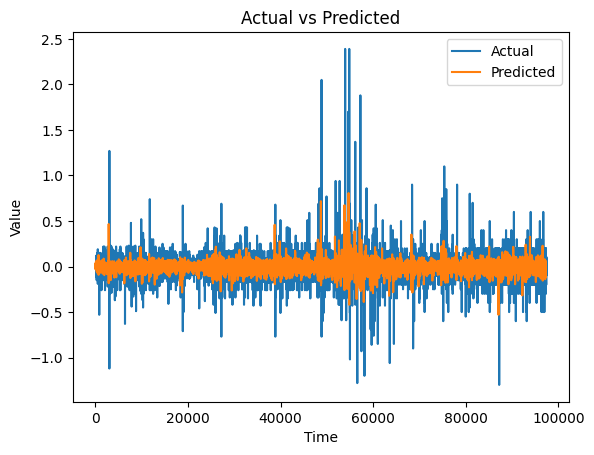

In [34]:
# Plot the graph
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### MSN

[-0.64469182  0.00157494  0.61022792 -0.40978138  0.23768091  0.2066242 ]
-0.08305483328232678
        Actual  Predicted
79778      0.0   0.072945
41048      0.0   0.087353
19977      0.0   0.054166
14689      0.0  -0.133968
105877     0.0   0.001657
...        ...        ...
3740       0.3   0.046987
64304     -0.1  -0.012581
110478     0.0  -0.017833
113616     0.0   0.023811
16425     -0.1  -0.097581

[33801 rows x 2 columns]
Mean Absolute Error  0.09881004109596425
Mean Squared Error  0.03322957599616492
Root Mean Error  0.1822898131991059


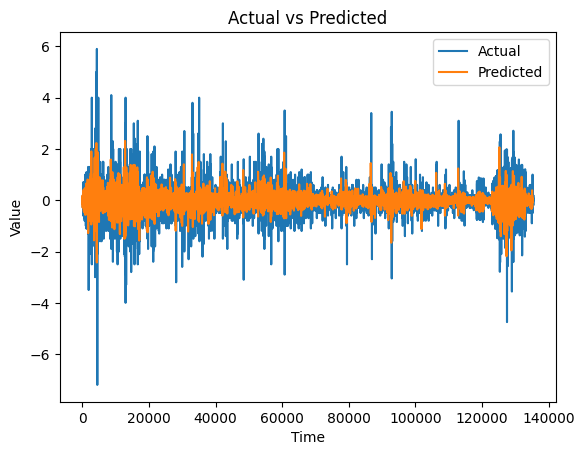

In [35]:
x = df2[['Close',	'RSI', 'EMAF', 'EMAM',	'EMAS',	'TargetNextClose']]
y = df2['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)
predicted = regressor.predict(x_test)
# print(x_test)
# print(predicted)
_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
print(_df)
regressor.score(x_test,y_test)
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))
predicted = regressor.predict(x)

# Plot the graph
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### PNJ

[-1.09328776  0.00855275  1.4729616  -1.12462943  0.66692892  0.07815867]
-0.43693640477770124
        Actual  Predicted
111664    0.00   0.042814
51438     1.66   0.424058
110497   -0.45  -0.352112
35342     0.00   0.056790
108064    0.00  -0.393035
...        ...        ...
37128     0.00   0.189112
94819     0.00   0.004404
88192     0.00  -0.061516
105985    0.00   0.009849
20552    -0.22   0.376777

[31290 rows x 2 columns]
Mean Absolute Error  0.3118969206141382
Mean Squared Error  0.23349556843867506
Root Mean Error  0.4832137916478327


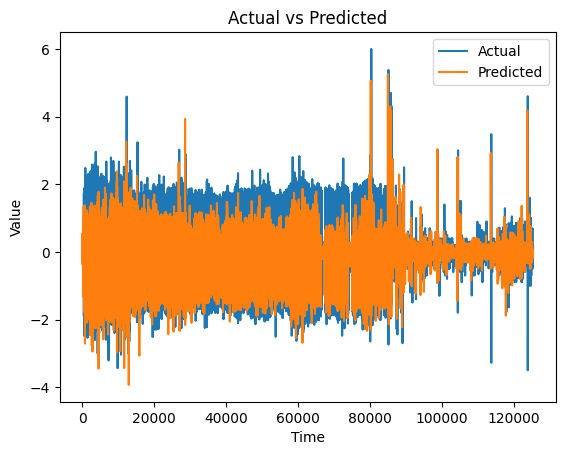

In [36]:
x = df3[['Close',	'RSI', 'EMAF', 'EMAM',	'EMAS',	'TargetNextClose']]
y = df3['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)
predicted = regressor.predict(x_test)
# print(x_test)
# print(predicted)
_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
print(_df)
regressor.score(x_test,y_test)
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))
predicted = regressor.predict(x)

# Plot the graph
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### VIC

[-5.79912102e-01  4.08038548e-04  5.34624083e-01 -4.06985578e-01
  2.38086505e-01  2.14250713e-01]
-0.02711702004949508
       Actual  Predicted
31770     0.3   0.135335
98713     0.0   0.026537
94816     0.0  -0.010413
65610     0.0  -0.023539
60946    -0.1  -0.243460
...       ...        ...
47912     0.1   0.061068
12466     0.0  -0.011770
73691     0.0  -0.037990
1278     -0.2   0.059503
79608     0.0  -0.004183

[25279 rows x 2 columns]
Mean Absolute Error  0.09486043998378019
Mean Squared Error  0.030914601575369613
Root Mean Error  0.17582548613716276


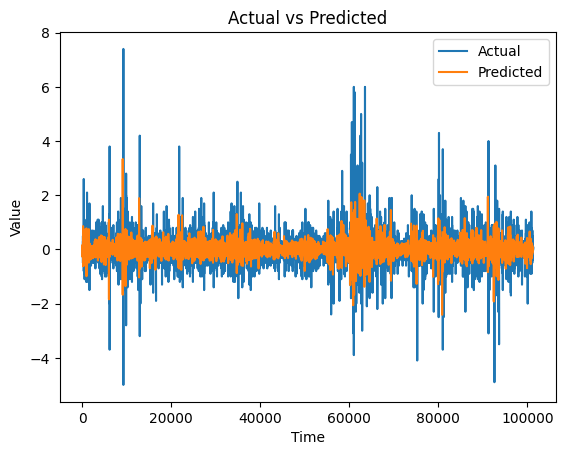

In [37]:
x = df4[['Close',	'RSI', 'EMAF', 'EMAM',	'EMAS',	'TargetNextClose']]
y = df4['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)
predicted = regressor.predict(x_test)
# print(x_test)
# print(predicted)
_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
print(_df)
regressor.score(x_test,y_test)
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))
predicted = regressor.predict(x)

# Plot the graph
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()